In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

import cv2
# remove verison errors
import warnings
warnings.filterwarnings('ignore')

In [34]:
import tensorflow as tf

In [35]:
gpu = tf.config.experimental.list_physical_devices('GPU')
for g in gpu:
    tf.config.experimental.set_memory_growth(g, True)
len(gpu) # Check if GPU is available

1

# Reading the Images

glob is a Python module used to find all the file names in a folder that match a specific pattern (like *.jpg for all JPEG images)

    - glob helps you quickly search for files or folders matching a pattern.


In [36]:
normal = glob('/home/yuk/Documents/BigProject/Dataset/Normal/*.png')
tuberculosis = glob('/home/yuk/Documents/BigProject/Dataset/Tuberculosis/*.png')

In [37]:
img_nor = plt.imread(normal[69])
img_tub = cv2.imread(tuberculosis[49])
img_nor.shape , img_tub.shape

((512, 512, 3), (512, 512, 3))

img_nor.shape ---> (512, 512, 3)
img_tub.shape ---> (512, 512, 3)

(Height , Width , Channels)

# Display Images

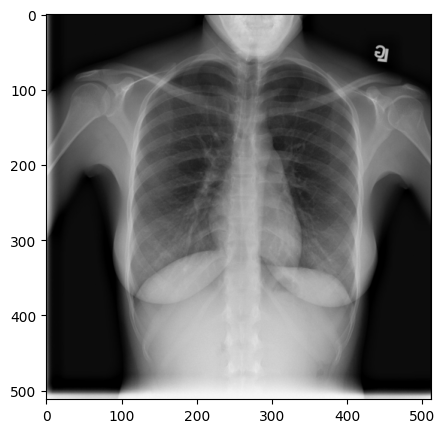

In [38]:
fig , ax = plt.subplots(figsize=(5,5))
ax.imshow(img_nor) # Image of a normal lung without TB  
plt.show()

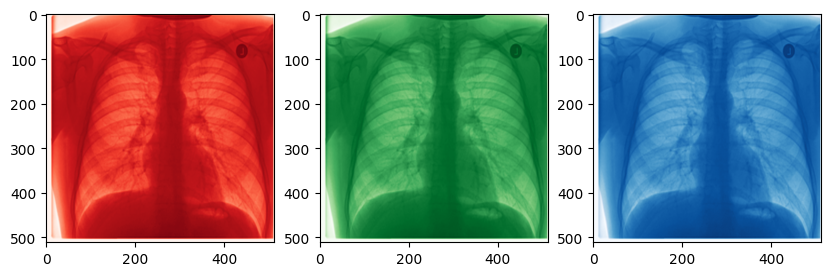

In [39]:
fig, axs = plt.subplots(1 ,3 , figsize=(10, 5))
axs[0].imshow(img_tub[:,:,0], cmap='Reds') 
axs[1].imshow(img_tub[:,:,1], cmap='Greens') 
axs[2].imshow(img_tub[:,:,2], cmap='Blues')
plt.show()  

In [40]:
from skimage import exposure , img_as_float

image1 = img_as_float(img_nor)
image2 = img_as_float(img_tub)

gamma_corrected1 = exposure.adjust_gamma(image1, 0.5)
gamma_corrected2 = exposure.adjust_gamma(image2, 0.5)

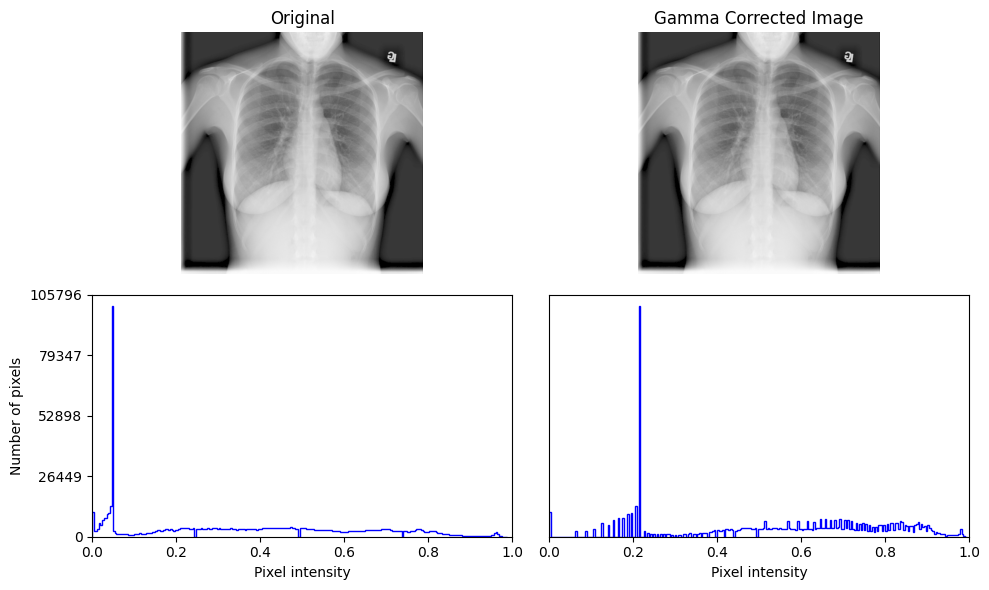

In [41]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected1, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image1.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected1.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the normal lung X-ray graph (top image), we can see that the blue line forms three distinct humps or peaks-one small peak at the far left, a medium peak in the middle, and a taller peak on the right. This pattern shows that healthy lungs have a good mix of different brightness levels, representing the natural contrast between air-filled areas (darker) and tissue/bone structures (brighter). After gamma correction, these brightness values spread out into a pattern that looks like a comb with many spikes, but still maintain the overall shape with multiple peaks, showing the lung's normal varied texture.

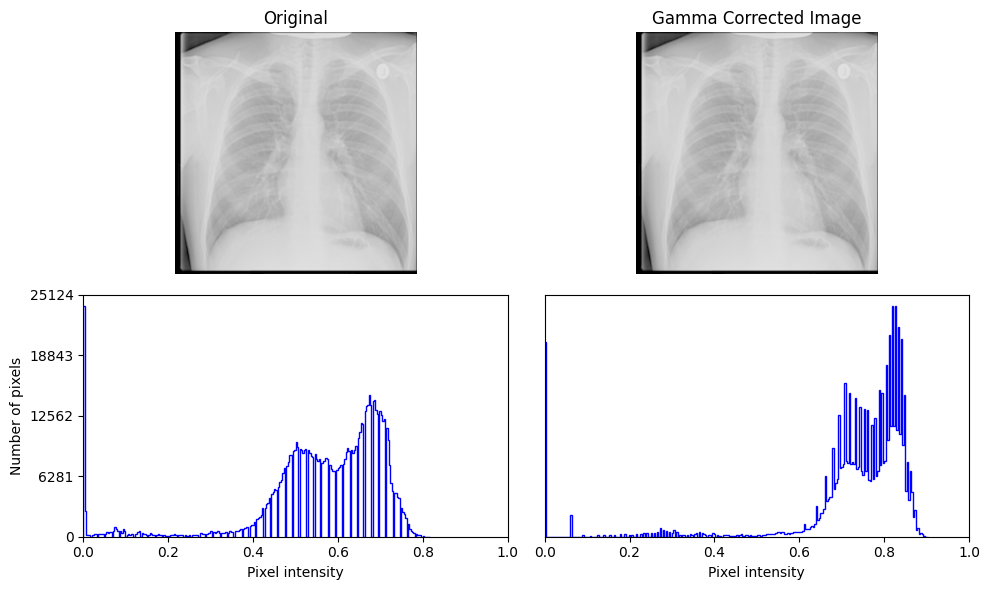

In [42]:
# Display the original and gamma_corrected images side by side
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
ax = axes.ravel()

ax[0].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(gamma_corrected2, cmap=plt.cm.gray)
ax[1].set_title('Gamma Corrected Image')
ax[1].set_axis_off()

ax[2].hist(image2.ravel(), bins=256, histtype='step', color='blue')
ax[2].set_xlim(0, 1)
ax[2].set_xlabel('Pixel intensity')
ax[2].set_yticks([])
ax[2].set_ylabel('Number of pixels')
y_min, y_max = ax[2].get_ylim()
ax[2].set_yticks(np.linspace(0, y_max, 5))

ax[3].hist(gamma_corrected2.ravel(), bins=256, histtype='step', color='blue')
ax[3].set_xlim(0, 1)
ax[3].set_xlabel('Pixel intensity')
ax[3].set_yticks([])

plt.tight_layout()
plt.show()

In the tuberculosis (TB) lung X-ray graph (bottom image), the most noticeable difference is how the brightness values are more concentrated into one main mountain-shaped area in the middle-right side of the graph, with a tall spike at the far left. This shows that TB causes more uniform density in the lungs as infection creates areas that appear similar in brightness. After gamma correction, the TB lung's histogram shifts dramatically to the right side with tall, regular spikes, indicating that the diseased tissue becomes more uniformly bright. This difference in patterns helps doctors and computers distinguish between healthy lungs and those affected by tuberculosis.

Normal Lung (first set):
The graph for the healthy lung shows a wide and balanced spread of pixel brightness, with several peaks. This means the lung tissue is varied and air spaces are clear, which is typical for healthy lungs. The pattern reflects normal, well-aerated lung structure.

TB Lung (second set):
The TB lung graph is more concentrated in the middle and right, with fewer peaks and a more uniform shape. This indicates the lung tissue is denser and less varied, which happens when infection or scarring fills the air spaces. This pattern is a sign of disease affecting the lung’s normal structure.

# Loading Images with Keras Utilities

In [43]:
data = tf.keras.utils.image_dataset_from_directory('/home/yuk/Documents/BigProject/Dataset',image_size=(512, 512),batch_size=32,color_mode='grayscale')

Found 2400 files belonging to 2 classes.


This turns the TensorFlow dataset data into a NumPy-style iterator, so you can loop through the data and get batches as normal NumPy arrays.

    - We need this because it does not load data directly into the memory , so we just have to use the iterator to convert them into normal numpy array such as ex (x,y)

In [44]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [45]:
batch = data_iterator.next()
# Images represented as a numpy array and labels represented as a numpy array
batch[0].shape , batch[1].shape 

((32, 512, 512, 1), (32,))

class 1 contains TB ,
class 0 Does not contain any TB

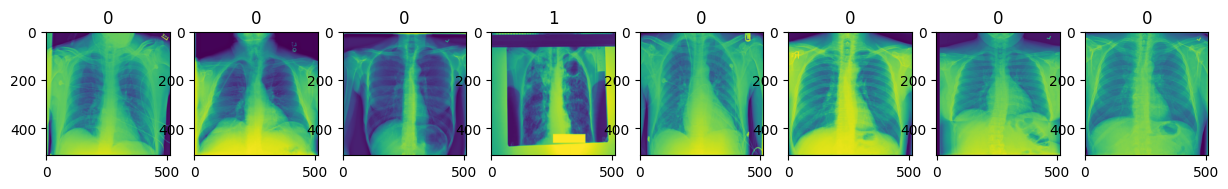

In [46]:
fig , ax = plt.subplots(ncols=8 , figsize=(15,15))
for idx , img in enumerate(batch[0][:8]): # Gets first 8 images
    ax[idx].imshow(img.astype(int))       
    ax[idx].set_title(batch[1][idx]) # Gets the first 8 labels as well

In [47]:
batch[1] # Labels 

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1], dtype=int32)

In [48]:
batch[0].max() # checking the max pixel value

255.0

# CLAHE (Contrast Limited Adaptive Histogram Equalization)

This process improves the contrast in each image, making the details inside the lungs clearer and more visible.

# Normalizing

Adjusting the pixel intensity for better image processing , scaling
the values to [0 , 1]

In [49]:
from tensorflow import keras
tf.config.optimizer.set_jit(True)  

In [50]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [51]:
import tf_clahe
from tensorflow.keras import layers

gpu = True

@tf.function(experimental_compile=True)  # Enable XLA
def fast_clahe(img):
    return tf_clahe.clahe(img, gpu_optimized=True)

IMG_SIZE = 128

data = data.map(lambda images, label: (tf_clahe.clahe(tf.cast(images, tf.float32)), label))

resize_and_rescale = tf.keras.Sequential([   # Normalizing 
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

def preproce_rescaling(image, label):
    image = resize_and_rescale(image)
    return image, label

data = data.map(preproce_rescaling)


In [52]:
for image, label in data.take(1):
    print("Min pixel value:", tf.reduce_min(image).numpy())
    print("Max pixel value:",tf.reduce_max(image).numpy()) 

Min pixel value: 0.0
Max pixel value: 1.0


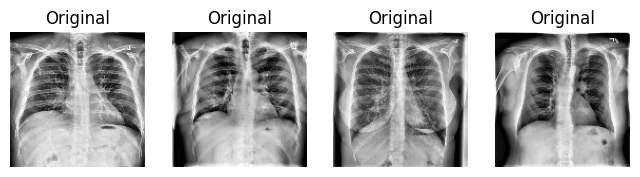

In [53]:
for images, _ in data.take(1):
    plt.figure(figsize=(8, 4))
    for i in range(4):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title('Original')
        plt.axis('off')

In [54]:
# import tensorflow_addons as tfa

# @tf.function(experimental_compile=True)
# def image_sharpening(image, label):
#     sharpened = tfa.image.sharpness(image, factor=1.5)
#     return sharpened, label

# data = data.map(image_sharpening)


# Data Augmentation

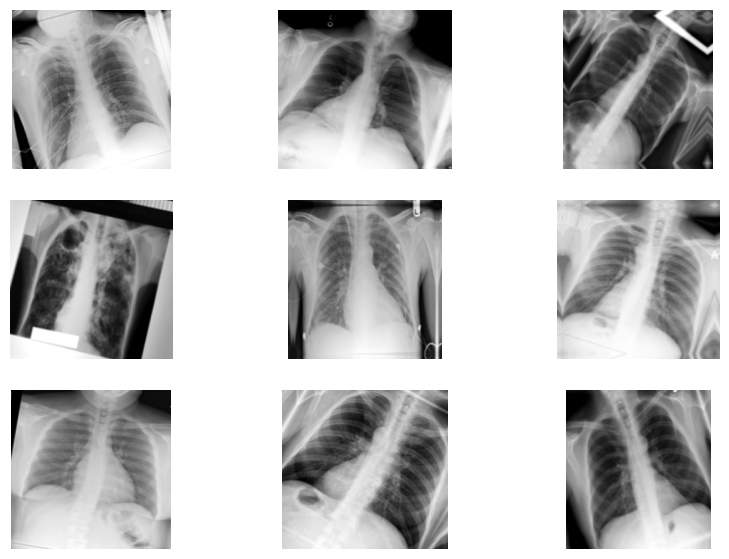

In [55]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.Resizing(224, 224),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomContrast(0.1),
    tf.keras.layers.GaussianDropout(0.1),
    tf.keras.layers.RandomBrightness(0.1), 
    tf.keras.layers.RandomWidth(0.1),
])

plt.figure(figsize=(10, 7))
for i in range(9):
    augmented_image = data_augmentation(batch[0][i])  # Using batch[0] to access images
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image.numpy().astype("uint8"),cmap='gray')  
    plt.axis("off")

# CNN Model Training

In [56]:
len(data) # ---------> There are 54 , 32 batches 

75

In [57]:
train_data = data.take(52)
val_data = data.skip(52).take(11)
test_data = data.take(63).take(12)

In [58]:
from tensorflow.keras import layers, models, regularizers 
from keras.layers import Dropout


train_labels = np.concatenate([labels.numpy() for _, labels in train_data])

# Calculate class weights
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = {
    0: total_samples / (2 * class_counts[0]),  
    1: total_samples / (2 * class_counts[1])   
}

print("Class weights:", class_weights)


Class weights: {0: 0.6974015088013411, 1: 1.7664543524416136}


32 → 64 → 128 → 256

In [59]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))  

In [60]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [61]:
layers.GlobalAveragePooling2D(),
layers.Dense(64, activation='relu'),
layers.Dropout(0.5), 
layers.Dense(1, activation='sigmoid')

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy',patience=5,min_delta=0.001,restore_best_weights=True)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy',tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [64]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

Class_weights: {0: 0.77, 1: 1.43}

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.5,
    patience=6,
    min_lr=1e-7
)

hist = model.fit(train_data , 
                 epochs = 15 , 
                 class_weight=class_weights, 
                 validation_data= val_data, 
                 callbacks=[early_stop, lr_scheduler]
                 ) 

Epoch 1/15


ValueError: in user code:

    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1155, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/metrics/confusion_metrics.py", line 1486, in update_state  **
        return metrics_utils.update_confusion_matrix_variables(
    File "/home/yuk/Documents/BigProject/class/lib/python3.10/site-packages/keras/src/utils/metrics_utils.py", line 672, in update_confusion_matrix_variables
        y_pred.shape.assert_is_compatible_with(y_true.shape)

    ValueError: Shapes (None, 14, 14, 128) and (None,) are incompatible


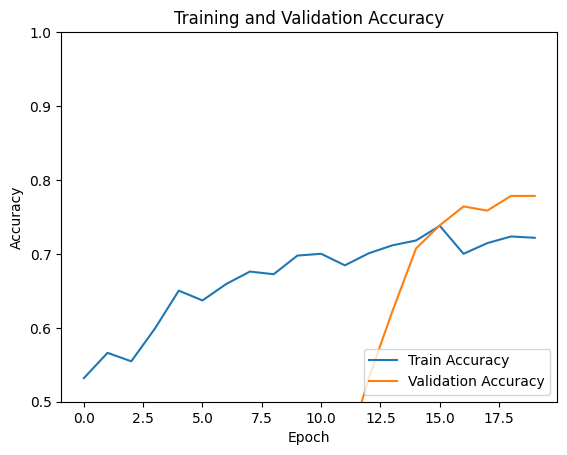

12/12 - 36s - loss: 0.5526 - accuracy: 0.7917 - 36s/epoch - 3s/step
Test accuracy: 0.7917


In [ ]:
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_data, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

In [ ]:
# Check a batch of data
for images, _ in train_data.take(1):
    print("Image shape:", images.shape)  # Should match model input shape


Image shape: (32, 128, 128, 1)
